In [ ]:
from google.colab import files

import pandas as pd
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

import cv2
print(cv2.__version__)
# example of face detection with opencv cascade classifier
from cv2 import imread
from cv2 import rectangle
from cv2 import imshow
from PIL import Image 

# some imports for data augmentation
import matplotlib.image as mpimg
import random
from skimage import exposure
from skimage.util import random_noise
from skimage.transform import rotate
from cv2 import resize

import shutil 

import os

4.1.2


In [ ]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### **Analyze Dataset:**

1. Have a table for # of images in each dataset, list # of images in each class
2. Have a table for age, gender, race
3. Using the age, gender, race table, move some images from part1/2 to part 3 in order to have a smaller testig dataset (age, gender and race should be equaly distributed)
4. Step 1.1
5. **Research**: how to remove images that are not human face / not well-cropped -> Clean data

In [ ]:
age_range = [0,2,6,12,20,32,43,53,116]
header = ['Filename','age', 'gender', 'race', 'date and time and format']

In [ ]:
def get_fileList(fileName):
  file = pd.read_csv(
    "/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/"+fileName,
    names=header,
    index_col=False)
  
  file = file[['Filename','age', 'gender', 'race']]
  return file

In [ ]:
def get_age_race_table_1(df_1):
  df_1=df_1[['Filename','age', 'gender', 'race']]
  df_1_out = df_1.groupby([pd.cut(df_1.age,age_range),df_1.race,df_1.gender])['age'].count()
  # df_1_out=(pd.concat([df_1_out.to_frame(),
  #           df_1_out.sum(level=0).to_frame()
  #                 .assign(claim_type= "total")
  #                .set_index('claim_type', append=True)]).sort_index())
  
  return df_1_out

#### **Dataset Analysis: part 1:**


In [ ]:
fileList_1 = get_fileList('Part 1 fileList.csv')
print(fileList_1.shape)
fileList_1_table=get_age_race_table(fileList_1)
fileList_1_table.T

#### **Dataset Analysis: part 2:**

In [ ]:
fileList_2 = get_fileList('Part 2 fileList.csv')
print(fileList_2.shape)
fileList_2_table=get_age_race_table(fileList_2)
fileList_2_table.T

#### **Dataset Analysis: part 3:**

In [ ]:
fileList_3 = get_fileList('Part 3 fileList.csv')
print(fileList_3.shape)
fileList_3_table=get_age_race_table(fileList_3)
fileList_3_table.T

#### **Result:**

Want to have at around 250~500 images for each classes, so just move some files from part 1/2 to part 3.



In [ ]:
temp_1 = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2')
age_classes = ['0-2','3-6','7-12','13-20','21-32','33-43','44-53','53-100+']

In [ ]:
nameList = temp_1.samples
len(nameList)

In [ ]:
def get_age_range(age):
  age_range = ''
  if age <= 2:
    age_range = age_classes[0]
  elif age <= 6:
    age_range = age_classes[1]
  elif age <= 12:
    age_range = age_classes[2]
  elif age <= 20:
    age_range = age_classes[3]
  elif age <= 32:
    age_range = age_classes[4]
  elif age <= 43:
    age_range = age_classes[5]
  elif age <= 53:
    age_range = age_classes[6]
  else:
    age_range = age_classes[7]
  return age_range

### **One-time file movement**

In [ ]:
 #Move all files in "Age 0-2" to part 3
 shutil.move('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age 0-2','/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 0-2')

In [ ]:
 #Move all files in "Age 3-6" to part 3
 shutil.move('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age 3-6','/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 3-6')

In [ ]:
 #Move all files in "Age 7-12" to part 3
 shutil.move('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age 7-12','/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 7-12')

In [ ]:
 #Move all files in "Age 13-20" to part 3
 shutil.move('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age 13-20','/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 13-20')

In [ ]:
shutil.move('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 13-20/Age 13-20','/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2')

In [ ]:
temp_2 = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2')
nameList_2 = temp_2.samples
len(nameList_2)

In [ ]:

stop = False
count_1 =0 #0-2
count_2 =0 #3-6
count_3 =0 #7-12
while stop == False:
  selectedFile = random.choice(nameList_2)
  temp_range = get_age_range(int(selectedFile[0].split('/')[-1].split('_')[0]))
  if temp_range == '32-43':
    if temp_range == '32-43':
      if count_1 <30:
        try:
          shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age '+temp_range)
          count_1 +=1
          print(count_1)
        except Exception as e:
          print(e)

    # elif temp_range == '3-6':
    #   if count_2 <50:       
    #     try:
    #       shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age '+temp_range)
    #       count_2 +=1
    #     except Exception as e:
    #       print(e)
    # else:
    #   if count_3 <50:
    #     try:
    #       shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age '+temp_range)
    #       count_3 +=1
    #     except Exception as e:
    #       print(e)
    
    if (count_1 == 30):
      stop = True

In [ ]:
temp_3 = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3')
nameList_3 = temp_3.samples
len(nameList_3)

In [ ]:
count_4 =0 #21-32
count_5 =0 #33-43
count_6 =0 #44-53
count_7 =0 #53-100+
stop = False
while stop == False:
  selectedFile = random.choice(nameList_3)
  temp_range = get_age_range(int(selectedFile[0].split('/')[-1].split('_')[0]))
  if temp_range == '13-20' or temp_range == '33-43' or temp_range == '44-53' or temp_range == '53-100+':
    # if temp_range == '21-32':
    #   if count_4 <30:       
    #     try:
    #       shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age '+temp_range)
    #       count_4 +=1
    #     except Exception as e:
    #       print(e)

    # elif temp_range == '33-43':
    #   if count_5 <100:       
    #     try:
    #       shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age '+temp_range)
    #       count_5 +=1
    #     except Exception as e:
    #       print(e)
    # elif temp_range == '44-53':
    #   if count_6 <100:       
    #     try:
    #       shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age '+temp_range)
    #       count_6 +=1
    #     except Exception as e:
    #       print(e)
    if temp_range == '13-20':
      if count_7 <100:
        try:
          shutil.move(selectedFile[0],'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 2/Age '+temp_range)
          count_7 +=1
        except Exception as e:
          print(e)
    
    if (count_7 == 100 ):
      stop = True

#### **Result: Data Analysis for Part 3**

**Now within each classes, each race has at leaset one image.**

In [ ]:
#export filename to csv
part3_dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3')
print(len(part3_dataset.samples))

In [ ]:
name_list = np.asarray([item[0] for item in part3_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list:
  name=each.split('/')[-1].split('_')
  age_col.append(name[0])
  gender_col.append(name[1])
  race_col.append(name[2])
  file_names.append(each.split('/')[-1])
file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('Part 3_fileList_1.csv') 
files.download('Part 3_fileList_1.csv')

In [ ]:
fileList_3_1 = get_fileList('Part 3_fileList_1.csv')
print(fileList_3_1.shape)
fileList_3_1_table=get_age_race_table(fileList_3_1)
fileList_3_1_table.T


#### **Result: Data Analysis for Part 1**



In [ ]:
#export filename to csv
part1_dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 1')
print(len(part1_dataset.samples))

In [ ]:
name_list_1 = np.asarray([item[0] for item in part1_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list_1:

  name=each.split('/')[-1].split('_')
  if (len(name[0])==0  or  len(name[1])>3 or len(name[2])>1): 
    continue
  age_col.append(name[0])
  gender_col.append(name[1])
  race_col.append(name[2])
  file_names.append(each.split('/')[-1])


file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('Part 1_fileList_1.csv') 
files.download('Part 1_fileList_1.csv')

In [ ]:
fileList_1_1 = get_fileList('Part 1_fileList_1.csv')
print(fileList_1_1.shape)
fileList_1_1_table=get_age_race_table(fileList_1_1)
fileList_1_1_table.T


####**Aug 03: For unbalanced dataset:**

In [ ]:
#export filename to csv
unbalance_dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped')
print(len(unbalance_dataset.samples))

5602


In [ ]:
name_list_unbalance = np.asarray([item[0] for item in unbalance_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list_unbalance:
    name=each.split('/')[-1].split('_')
    if (len(name)==4):
      age_col.append(name[0])
      gender_col.append(name[1])
      race_col.append(name[2])
      file_names.append(each.split('/')[-1])

file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('UnBalance Dataset.csv') 
files.download('UnBalance Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
unbalance_list = get_fileList('UnBalance Dataset.csv')

print(unbalance_list.shape)
unbalance_table=get_age_race_table_1(unbalance_list)
pd.set_option('display.max_rows', None)
print(unbalance_table.T)



(5601, 4)
age        race  gender
(0, 2]     0     0          86
                 1          79
           1     0           9
                 1          10
           2     0         180
                 1         111
           3     0          68
                 1          61
           4     0          40
                 1          59
(2, 6]     0     0         102
                 1         172
           1     0          13
                 1          22
           2     0          74
                 1         127
           3     0          37
                 1          69
           4     0          17
                 1          66
(6, 12]    0     0         243
                 1         237
           1     0          20
                 1          16
           2     0          20
                 1          37
           3     0          16
                 1          43
           4     0          22
                 1          46
(12, 20]   0     0         199
     

In [ ]:
# 
df_1 = unbalance_list
df_1_out = df_1.groupby([pd.cut(df_1.age,age_range),df_1.race])['age'].count()
df_1_out.plot()

####**Aug 02: For balance dataset:**

In [ ]:
#export filename to csv
balance_dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6')
print(len(balance_dataset.samples))

8000


In [ ]:
name_list_balance = np.asarray([item[0] for item in balance_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list_balance:
  print(each)
  name=each.split('/')[-1].split('_')
  age_col.append(name[0])
  gender_col.append(name[1])
  race_col.append(name[2])
  file_names.append(each.split('/')[-1])
file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('Balance Dataset.csv') 
files.download('Balance Dataset.csv')

Streaming output truncated to the last 5000 lines.
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20161219154705684.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20161219161157166.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170103210954356.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170109191400809.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170109192415151.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170110205355795.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170110211426831.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6/3-6/3_0_0_20170110211507718.jpg
/content/gdrive/My Drive/APS360 Group9 Projec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
balance_list = get_fileList('Balance Dataset.csv')

print(balance_list.shape)
balance_table=get_age_race_table_1(balance_list)
pd.set_option('display.max_rows', None)
print(balance_table.T)



(8000, 4)
age        race  gender
(0, 2]     0     0         100
                 1         100
           1     0         100
                 1         100
           2     0         100
                 1         100
           3     0         100
                 1         100
           4     0         100
                 1         100
(2, 6]     0     0         100
                 1         100
           1     0         100
                 1         100
           2     0         100
                 1         100
           3     0         100
                 1         100
           4     0         100
                 1         100
(6, 12]    0     0         100
                 1         100
           1     0         100
                 1         100
           2     0         100
                 1         100
           3     0         100
                 1         100
           4     0         100
                 1         100
(12, 20]   0     0         100
     

### **Step 1: Load data**

####**1.1 One-time image processing**
**Note: *DON'T run code in this part everytime*,** or it will take 20+ min to re-crop all images and duplicate images in dataset
1.   Load images
2.   Add/Create ROI coordinators
3.   Crop (face only)
4.  Save cropped images to an google drive folder. 
Face detection and image cropping/saving take time, so we will use the cropped images to train our model. After having a well-trained model, we could write some code to let algorithm take un-cropped images as input.

#### **Face Detection + Add ROI + Crop Images:**

Use pre-trained model (haarcascade) from OpenCV for face detection

In [ ]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3',
                                                    transform=transform)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [ ]:
#Multiple faces in the same picture (e.g. a person with a photo). Temp solution: count # of eyes. Pick the face with larger count
#Logic: Sometimes the algorithm treat norstril  or the wrinkles around eyes as eye (because they are darker). For a image with low quality, a clear face would have more eye count.

def get_face_ROI_crop(img,padding):

  faces = face_cascade.detectMultiScale(img, scaleFactor=1.02,minNeighbors =5) #face detection
  cropped = img
  return_img = img
  return_crop= img
  prev_eye_count=0

  for box in faces:
    x, y, width, height = box
    x2, y2 = int(x + width), int(y + height)

  
    x = int(x-padding) if (x-padding>0) else x
    y = int(y-padding) if (y-padding>0) else y
    x2 = int(x2+padding) if (x2+padding<img.shape[1]) else x2
    y2 = int(y2+padding) if (y2+padding < img.shape[0]) else y2
    # rectangle(img, (int(x), int(y)), (x2, y2), (255, 0, 0), 2) # For testing, draw a rectangle around the face
    cropped = img[y:y2,x:x2]

    eyes = eye_cascade.detectMultiScale(cropped) # eye detection
   
    if len(eyes) >0:
      eye_count=0
      for (ex,ey,ew,eh) in eyes:
        eye_count+=1
        # cv2.rectangle(cropped,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # For testing, draw a rectangle around the eyes
      
      if eye_count > prev_eye_count:
        return_img = img
        return_crop = cropped
        prev_eye_count= eye_count
    
  return return_img,return_crop

In [ ]:
def save_cropped_image(img,fileName):
  age = int(fileName.split('_')[0])
  age_range = get_age_range(age)
    
  img.savefig('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Cropped images/'+age_range+'/'+fileName,
          quality=95,
            bbox_inches='tight',
            pad_inches=0.0)

In [ ]:
def face_center_crop(padding=10):   
  filename_list = dataset.imgs
  k=0

  for each in filename_list:
    # print('Image ',k)
    img_path = each[0]
    # print(img_path)
    img = cv2.imread(img_path,0)
    image_fileName = img_path.split('/')[-1]
    img,cropped_result = get_face_ROI_crop(img,padding)
   
    # For testing, uncomment below plt codes and the rectangle part in  get_face_ROI_crop function to draw the output image 
    # plt.figure()
    # # plt.axis('off')
    # plt.title('Image '+str(k))
    # plt.imshow(img)

    f = plt.figure()
    plt.axis('off')
    plt.imshow(cropped_result)

    #save cropped images
    save_cropped_image(f,image_fileName)
    plt.close(f)
    k+=1
  
  print('k=',k)

#### **Crop images**

In [ ]:
face_center_crop()

k= 2085



#### **Data Cleaning**

In [ ]:
import random
transform = transforms.Compose(
    [ transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset_temp = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3',
                                                    transform=transform)

filename_list = random.sample(dataset_temp.imgs,len(dataset_temp.imgs))
k=0
padding=10
print(filename_list)

[('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 21-32/32_1_0_20170120220848324.jpg', 2), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 53-100+/70_0_1_20170116214435321.jpg', 6), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 0-2/1_1_3_20161220145435951.jpg', 0), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 53-100+/57_1_0_20170120221057091.jpg', 6), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 13-20/20_1_0_20170117133854316.jpg', 1), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 32-43/36_0_3_20170119201817029.jpg', 4), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 0-2/1_1_2_20161219142012569.jpg', 0), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3/Age 44-53/51_0_3_20170119205612416.jpg', 5), ('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/

In [ ]:
#Multiple faces in the same picture (e.g. a person with a photo). Temp solution: count # of eyes. Pick the face with larger count
#Logic: Sometimes the algorithm treat norstril  or the wrinkles around eyes as eye (because they are darker). For a image with low quality, a clear face would have more eye count.

def TEMP (img,padding):

  faces = face_cascade.detectMultiScale(img, scaleFactor=1.02,minNeighbors =5) #face detection
  cropped = img
  return_img = img
  return_crop= img
  prev_eye_count=0

  for box in faces:
    x, y, width, height = box
    x2, y2 = int(x + width), int(y + height)

  
    x = int(x-padding) if (x-padding>0) else x
    y = int(y-padding) if (y-padding>0) else y
    x2 = int(x2+padding) if (x2+padding<img.shape[1]) else x2
    y2 = int(y2+padding) if (y2+padding < img.shape[0]) else y2
    rectangle(img, (int(x), int(y)), (x2, y2), (255, 0, 0), 2) # For testing, draw a rectangle around the face
    cropped = img[y:y2,x:x2]

    eyes = eye_cascade.detectMultiScale(cropped) # eye detection
   
    if len(eyes) >0:
      eye_count=0
      for (ex,ey,ew,eh) in eyes:
        eye_count+=1
        cv2.rectangle(cropped,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # For testing, draw a rectangle around the eyes
    
    
    return_img = img
    return_crop = cropped
      
    
  return return_img,return_crop

In [ ]:
#Multiple faces in the same picture (e.g. a person with a photo). Temp solution: count # of eyes. Pick the face with larger count
#Logic: Sometimes the algorithm treat norstril  or the wrinkles around eyes as eye (because they are darker). For a image with low quality, a clear face would have more eye count.

def Temp_2(img,padding):

  faces = face_cascade.detectMultiScale(img, scaleFactor=1.02,minNeighbors =5) #face detection
  cropped = img
  return_img = img
  return_crop= img
  prev_eye_count=0
  clean = img

  for box in faces:
    x, y, width, height = box
    x2, y2 = int(x + width), int(y + height)

  
    x = int(x-padding) if (x-padding>0) else x
    y = int(y-padding) if (y-padding>0) else y
    x2 = int(x2+padding) if (x2+padding<img.shape[1]) else x2
    y2 = int(y2+padding) if (y2+padding < img.shape[0]) else y2
    rectangle(img, (int(x), int(y)), (x2, y2), (255, 0, 0), 2) # For testing, draw a rectangle around the face
    cropped = img[y:y2,x:x2]
    
   

    eyes = eye_cascade.detectMultiScale(cropped) # eye detection
   
    if len(eyes) >0:
      eye_count=0
      for (ex,ey,ew,eh) in eyes:
        eye_count+=1
        clean = cropped
        # cv2.rectangle(cropped,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # For testing, draw a rectangle around the eyes
      
      if eye_count > prev_eye_count:
        return_img = img
        return_crop = cropped
        prev_eye_count= eye_count
 
  return return_img,return_crop,clean

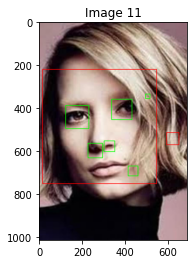

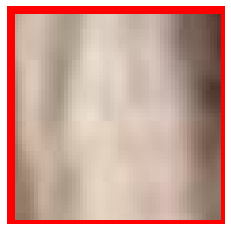

In [ ]:

for each in filename_list:
  # print('Image ',k)
  img_path = each[0]
  # print(img_path)
  img = cv2.imread(img_path,1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image_fileName = img_path.split('/')[-1]
  img,cropped_result = TEMP(img,padding)
  
  # For testing, uncomment below plt codes and the rectangle part in  get_face_ROI_crop function to draw the output image 
  plt.figure()
  # plt.axis('off')
  plt.title('Image '+str(k))
  plt.imshow(img)

  f = plt.figure()
  plt.axis('off')
  plt.imshow(cropped_result)


  if k>10:
    break
  
  k+=1

  
  print('k=',k)

In [ ]:
import random
transform = transforms.Compose(
    [ transforms.ToTensor()])
dataset_temp = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/part 3',
                                                    transform=transform)
filename_list=[]

In [ ]:
for each in dataset_temp.samples:
  print()
  filename_list.append(each[0])

In [ ]:
k=0
for each in filename_list:
  # print('Image ',k)
  img_path = each
  img = cv2.imread(img_path,1)
  img=cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
  plt.figure()
  plt.title('Image Pre '+str(k))
  plt.imshow(img)


  image_fileName = img_path.split('/')[-1]
  img,cropped_result,clean = Temp_2(img,padding)
  # For testing, uncomment below plt codes and the rectangle part in  get_face_ROI_crop function to draw the output image 
  plt.figure()
  plt.axis('off')
  plt.title('Image '+str(k))
  plt.imshow(img)

  f = plt.figure()
  plt.axis('off')
  plt.title('cropped_result '+str(k))
  plt.imshow(cropped_result)

  plt.figure()
  plt.axis('off')
  plt.title('Crop Result '+str(k))
  plt.imshow(clean)

  #save cropped images


  if k>20:
    break
  
  k+=1

  
  print('k=',k)

Output hidden; open in https://colab.research.google.com to view.

## **Method 2: DEBUG: #Use pre-cropped Images**

In [ ]:
age_range = [0,2,6,12,20,32,43,53,116]
header = ['Filename','age', 'gender', 'race', 'date and time and format']

In [ ]:
def get_fileList(fileName):
  file = pd.read_csv(
    "/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/"+fileName,
    names=header,
    index_col=False)
  
  file = file[['Filename','age', 'gender', 'race']]
  return file

In [ ]:
def get_age_race_table(df_1):
  df_1=df_1[['Filename','age', 'gender', 'race']]
  df_1_out = df_1.groupby([pd.cut(df_1.age,age_range),df_1.race,df_1.gender])['age'].count()
  df_1_out=(pd.concat([df_1_out.to_frame(),
            df_1_out.sum(level=0).to_frame()
                  .assign(claim_type= "total")
                 .set_index('claim_type', append=True)]).sort_index())
  
  return df_1_out

*** STARTING HERE ***
### Current Debug_PreCropped Race and Gender distribution ###

In [ ]:
#export filename to csv
cropped_dataset = torchvision.datasets.ImageFolder(root='/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6')
print(len(cropped_dataset.samples))

7710


In [ ]:
def get_age(age):
  age_range = ''
  if age <= 2:
    age_range = age_classes_debug[0]
  elif age <= 6:
    age_range = age_classes_debug[3]
  elif age <= 12:
    age_range = age_classes_debug[7]
  elif age <= 20:
    age_range = age_classes_debug[1]
  elif age <= 32:
    age_range = age_classes_debug[2]
  elif age <= 43:
    age_range = age_classes_debug[4]
  elif age <= 53:
    age_range = age_classes_debug[5]
  else:
    age_range = age_classes_debug[6]

  return age_range

In [ ]:
def count_gender_and_race(img_gender, img_race, count_race, count_gender):
  # gender counting
  if img_gender == 0:
    count_gender[0] += 1
  else: 
    count_gender[1] += 1

  # race counting
  if img_race == 0:
    count_race[0] += 1
  elif img_race == 1:
    count_race[1] += 1
  elif img_race == 2:
    count_race[2] += 1
  elif img_race == 3:
    count_race[3] += 1
  elif img_race == 4:
    count_race[4] += 1

In [ ]:
def count_gender_race(img_gender, img_race, count_updated):
  # white male
  if img_race == 0 and img_gender == 0:
    index = 0
  # black male
  elif img_race == 1 and img_gender == 0:
    index = 1
  # asian male
  elif img_race == 2 and img_gender == 0:
    index = 2
  # indian male
  elif img_race == 3 and img_gender == 0:
    index = 3
  # other male
  elif img_race == 4 and img_gender == 0:
    index = 4

  # white female
  if img_race == 0 and img_gender == 1:
    index = 5
  # black female
  elif img_race == 1 and img_gender == 1:
    index = 6
  # asian female
  elif img_race == 2 and img_gender == 1:
    index = 7
  # indian female
  elif img_race == 3 and img_gender == 1:
    index = 8
  # other female
  elif img_race == 4 and img_gender == 1:
    index = 9

  # update count
  count_updated[index] += 1

In [ ]:
c = 0
count_gender = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]] #male, female
count_race = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0], [0,0,0,0,0]] #white, black, asian, indian, hispanic
# order is 0-2, 13-20, 21-32, 3-6, 33-43, 44-53, 53-100+, 7-12
count_updated = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]

for each in Debug_PreCropped7_dataset.samples:
  img_path = each[0]
  image_fileName = img_path.split('/')[-1]
  img_age = get_age(int(image_fileName.split('_')[0]))
  img_gender = int(image_fileName.split('_')[1])
  img_race = int(image_fileName.split('_')[2])

  if img_age == age_classes_debug[0]:
    count_gender_race(img_gender, img_race, count_updated[0])
  elif img_age == age_classes_debug[1]:
    count_gender_race(img_gender, img_race, count_updated[1])
  elif img_age == age_classes_debug[2]:
    count_gender_race(img_gender, img_race, count_updated[2])
  elif img_age == age_classes_debug[3]:
    count_gender_race(img_gender, img_race, count_updated[3])
  elif img_age == age_classes_debug[4]:
    count_gender_race(img_gender, img_race, count_updated[4])
  elif img_age == age_classes_debug[5]:
    count_gender_race(img_gender, img_race, count_updated[5])
  elif img_age == age_classes_debug[6]:
    count_gender_race(img_gender, img_race, count_updated[6])
  elif img_age == age_classes_debug[7]:
    count_gender_race(img_gender, img_race, count_updated[7])

  if img_age == age_classes_debug[0]:
    count_gender_and_race(img_gender, img_race, count_race[0], count_gender[0])
  elif img_age == age_classes_debug[1]:
    count_gender_and_race(img_gender, img_race, count_race[1], count_gender[1])
  elif img_age == age_classes_debug[2]:
    count_gender_and_race(img_gender, img_race, count_race[2], count_gender[2])
  elif img_age == age_classes_debug[3]:
    count_gender_and_race(img_gender, img_race, count_race[3], count_gender[3])
  elif img_age == age_classes_debug[4]:
    count_gender_and_race(img_gender, img_race, count_race[4], count_gender[4])
  elif img_age == age_classes_debug[5]:
    count_gender_and_race(img_gender, img_race, count_race[5], count_gender[5])
  elif img_age == age_classes_debug[6]:
    count_gender_and_race(img_gender, img_race, count_race[6], count_gender[6])
  elif img_age == age_classes_debug[7]:
    count_gender_and_race(img_gender, img_race, count_race[7], count_gender[7])

  # if c == 5:
  #   break

  c += 1

print(count_updated)
print('Gender :', count_gender)
print(' Race:', count_race)


[[86, 9, 180, 68, 40, 79, 10, 111, 61, 59], [199, 9, 19, 24, 26, 250, 15, 38, 47, 73], [79, 16, 31, 44, 44, 145, 15, 90, 148, 88], [102, 13, 74, 37, 17, 172, 22, 127, 69, 66], [209, 11, 49, 39, 44, 223, 12, 32, 58, 23], [270, 18, 17, 32, 40, 249, 18, 13, 33, 10], [291, 24, 20, 23, 6, 270, 8, 29, 26, 2], [243, 20, 20, 16, 22, 237, 16, 37, 43, 46]]
Gender : [[383, 320], [277, 423], [214, 486], [243, 456], [352, 348], [377, 323], [364, 335], [321, 379]]
 Race: [[165, 19, 291, 129, 99], [449, 24, 57, 71, 99], [224, 31, 121, 192, 132], [274, 35, 201, 106, 83], [432, 23, 81, 97, 67], [519, 36, 30, 65, 50], [561, 32, 49, 49, 8], [480, 36, 57, 59, 68]]


### Run Race and Gender Adjustments ###

In [ ]:
# call fix_race_distribution 8 times for each age group to try and balance it
# this is only for RACE so far
# fix_race_distribution(0)
# fix_race_distribution(1)
# fix_race_distribution(2)
# fix_race_distribution(3)
# fix_race_distribution(4)
# fix_race_distribution(5)  
# fix_race_distribution(6)
fix_race_distribution(7)

# this is for GENDER

[100, 31, 25, 20, 23, 100, 33, 47, 52, 52]


In [ ]:
copy_count_gender = count_gender
copy_count_race = count_race
copy_count_updated = count_updated

copy_count_updated

[[86, 9, 180, 68, 40, 79, 10, 111, 61, 59],
 [199, 9, 19, 24, 26, 250, 15, 38, 47, 73],
 [79, 16, 31, 44, 44, 145, 15, 90, 148, 88],
 [102, 13, 74, 37, 17, 172, 22, 127, 69, 66],
 [209, 11, 49, 39, 44, 223, 12, 32, 58, 23],
 [270, 18, 17, 32, 40, 249, 18, 13, 33, 10],
 [291, 24, 20, 23, 6, 270, 8, 29, 26, 2],
 [243, 20, 20, 16, 22, 237, 16, 37, 43, 46]]

In [ ]:
total_num_of_images_per_age = [[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],[100,100,100,100,100,100,100,100,100,100],]
k = 0

def fix_race_distribution(current_index):

  for each in UTKCropped_dataset.imgs:
    img_path = each[0]
    bw_img = cv2.imread(img_path,1)
    #print(img_path)
    #img = cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB)
    image_fileName = img_path.split('/')[-1]
    image_fileName_comparison = image_fileName.split('.')[0]
    #print(image_fileName_comparison)

    img_age = get_age(int(image_fileName.split('_')[0]))

    #print(img_age)
    # only if the age match the indicies of gender_diff and race_diff, will we augment those images
    if img_age == age_classes_debug[current_index]:
      #print('Im in 0')
      img_race = int(image_fileName.split('_')[2])
      img_gender = int(image_fileName.split('_')[1])
      canswap = canSwap(image_fileName_comparison, test_dataset_list)
      canswap2 = canSwap(image_fileName_comparison, existing_dataset_list)

      # white male
      if img_race == 0 and img_gender == 0:
        index = 0
      # black male
      elif img_race == 1 and img_gender == 0:
        index = 1
      # asian male
      elif img_race == 2 and img_gender == 0:
        index = 2
      # indian male
      elif img_race == 3 and img_gender == 0:
        index = 3
      # other male
      elif img_race == 4 and img_gender == 0:
        index = 4

      # white female
      if img_race == 0 and img_gender == 1:
        index = 5
      # black female
      elif img_race == 1 and img_gender == 1:
        index = 6
      # asian female
      elif img_race == 2 and img_gender == 1:
        index = 7
      # indian female
      elif img_race == 3 and img_gender == 1:
        index = 8
      # other female
      elif img_race == 4 and img_gender == 1:
        index = 9

      # Swap out of Debug_PreCropped
      if copy_count_updated[current_index][index] > total_num_of_images_per_age[current_index][index]:
          folder_path = '/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped7/' + img_age
          found = False
          while found == False:
              selectedFile = random.choice(os.listdir(folder_path))
              #print(selectedFile)
              temp_fileName = selectedFile.split('/')[-1]
              temp_race = int(temp_fileName.split('_')[2])
              temp_gender = int(temp_fileName.split('_')[1])
              if temp_race == img_race and temp_gender == img_gender:
                  found = True
                  shutil.move(folder_path +'/' + selectedFile, '/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Extra_Images3')
          copy_count_updated[current_index][index] -= 1
      
      # Swap into Debug_PreCropped
      elif copy_count_updated[current_index][index] < total_num_of_images_per_age[current_index][index] and canswap == True and canswap2 == True:
          shutil.copy(img_path,'/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped7/' + img_age)
          copy_count_updated[current_index][index] += 1

    # break out of loop when done
    if copy_count_updated[current_index] == total_num_of_images_per_age[current_index]:
      break
  
  # view dataset
  print(copy_count_updated[current_index])


### Further Race and Gender Adjustments using Data Augmentation ###

In [ ]:
# data_augmentation(0)
data_augmentation(1)
data_augmentation(2)
data_augmentation(3)
data_augmentation(4)
data_augmentation(5)
data_augmentation(6)
data_augmentation(7)

18_0_2_20161219205328564.jpg
20_0_2_20170103234745028.jpg
15_0_2_20170104013327250.jpg
16_0_2_20170110232739283.jpg
19_0_2_20170104020121132.jpg
19_0_2_20170105183427303.jpg
19_0_2_20170102234958195.jpg
14_0_2_20170104013318514.jpg
13_0_2_20170103201417686.jpg
13_0_2_20170103201143159.jpg
15_0_2_20161219193832243.jpg
14_0_2_20170104012518441.jpg
14_0_2_20170110232701995.jpg
17_0_2_20170105183230223.jpg
15_0_2_20170104011938218.jpg
19_0_2_20170112003923755.jpg
15_0_2_20170102235056163.jpg
14_0_2_20170103200642238.jpg
19_0_2_20170110225634087.jpg
13_0_2_20170117152653604.jpg.chip.jpg
14_0_2_20170103201038791.jpg.chip.jpg
14_0_2_20170104012412945.jpg.chip.jpg
15_0_2_20170116181405111.jpg.chip.jpg
18_0_2_20161219205328564_flipped
18_0_2_20161219205328564_rotated
18_0_2_20161219205328564_noise
20_0_2_20170103234745028_flipped
20_0_2_20170103234745028_rotated
20_0_2_20170103234745028_noise
15_0_2_20170104013327250_flipped
15_0_2_20170104013327250_rotated
15_0_2_20170104013327250_noise
16_0_2

In [ ]:
# After inital fix race and gender function, there are still some race and gender inbalances since the UTKCropped dataset
# doesn't even have enough images. As a result, we will be data augmenting those races and genders that are lacking
import math

def data_augmentation(current_index):
  age_group = age_classes_debug[current_index]
  for i in range(10):
      # if the value isn't 100, then we don't have enough images and need to augment
      if copy_count_updated[current_index][i] < total_num_of_images_per_age[current_index][i]:
          # determine which race and gender index needs to be augmented
          # white male
          if i == 0:
            gender = 0
            race = 0
          # black male
          elif i == 1:
            gender = 0
            race = 1
          # asian male
          elif i == 2:
            gender = 0
            race = 2
          # indian male
          elif i == 3:
            gender = 0
            race = 3
          # other male
          elif i == 4:
            gender = 0
            race = 4
          # white female
          elif i == 5:
            gender = 1
            race = 0
          # black female
          elif i == 6:
            gender = 1
            race = 1
          # asian female
          elif i == 7:
            gender = 1
            race = 2
          # indian female
          elif i == 8:
            gender = 1
            race = 3
          # other female
          elif i == 9:
            gender = 1
            race = 4

          # number of augmentations needed
          num_augmentations_needed = total_num_of_images_per_age[current_index][i] - copy_count_updated[current_index][i]
          # now that we have the image chosen, we will augment each image at most 3 times
          num_imgs = math.ceil((total_num_of_images_per_age[current_index][i] - copy_count_updated[current_index][i]) / 3)
          count_current_augmentation = 0
          count_imgs_needed = 0

          # randomly select an image in the corresponding age group, race, and gender
          folder_path = '/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped7/' + age_group
          imgs_to_augment = []
          for selectedFile in os.listdir(folder_path):
              temp_fileName = selectedFile.split('/')[-1]
              temp_race = int(temp_fileName.split('_')[2])
              temp_gender = int(temp_fileName.split('_')[1])
              if temp_race == race and temp_gender == gender: 
                  print(temp_fileName)
                  img_path = folder_path +'/' + selectedFile
                  imgs_to_augment.append(img_path)
                  count_imgs_needed += 1
              # found the number of images needed to augment
              if count_imgs_needed >= num_imgs:
                  break

          # go through imgs_to_augment and augment them
          for image in imgs_to_augment:
              # get actual image
              bw_img = cv2.imread(image,1)
              img = cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB)
              image_fileName = image.split('/')[-1]

              if count_current_augmentation < num_augmentations_needed:
                  # Flip horizontally; no point flipping vertically because it is unlikely the model will be tested by upside down images
                  img_flip = np.fliplr(img)
                  #final_dataset.append(img_flip)
                  image_fileName_flip = image_fileName.split('.')[0] + '_flipped'
                  print(image_fileName_flip)
                  f = plt.figure()
                  plt.axis('off')
                  plt.imshow(img_flip)
                  save_augmented_image(f,image_fileName_flip)
                  plt.close(f)
                  copy_count_updated[current_index][i] += 1
                  count_current_augmentation += 1

              if count_current_augmentation < num_augmentations_needed:
                  # rotation
                  img_rotate = rotate(img, random.uniform(-45,45))
                  #final_dataset.append(img_rotate)
                  image_fileName_rotate = image_fileName.split('.')[0] + '_rotated'
                  print(image_fileName_rotate)
                  f = plt.figure()
                  plt.axis('off')
                  plt.imshow(img_rotate)
                  save_augmented_image(f,image_fileName_rotate)
                  plt.close(f)
                  copy_count_updated[current_index][i] += 1
                  count_current_augmentation += 1
                  
              if count_current_augmentation < num_augmentations_needed:
                  # noise
                  img_noise = random_noise(img, mode='s&p', clip=True)
                  #final_dataset.append(img_noise)
                  image_fileName_noise = image_fileName.split('.')[0] + '_noise'
                  print(image_fileName_noise)
                  f = plt.figure()
                  plt.axis('off')
                  plt.imshow(img_noise)
                  save_augmented_image(f,image_fileName_noise)
                  plt.close(f)
                  copy_count_updated[current_index][i] += 1
                  count_current_augmentation += 1
  
  # View dataset
  print(copy_count_updated[current_index])

In [ ]:
def save_augmented_image(img, fileName):
  age = int(fileName.split('_')[0])
  age_range = get_age(age)
    
  img.savefig('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped7/' + age_range + '/' + fileName,
          quality=95,
            bbox_inches='tight',
            pad_inches=0.0)

In [ ]:
# Need to check if the image we are trying to move from UTKCropped into Debug_PreCropped isn't part of the Test_PreCropped dataset
test_dataset_list = []
for each in test_dataset.samples:
  img_path = each[0]
  image_fileName = img_path.split('/')[-1]
  image_fileName = image_fileName.split('.')[0]
  test_dataset_list.append(image_fileName)

# We also want a different image than the current images so check if UTKCropped image already exists in Debug_PreCropped
existing_dataset_list = []
for each in Debug_PreCropped7_dataset.samples:
  img_path = each[0]
  image_fileName = img_path.split('/')[-1]
  image_fileName = image_fileName.split('.')[0]
  existing_dataset_list.append(image_fileName)

In [ ]:
def canSwap(image_fileName_comparison, dataset_list):
  if image_fileName_comparison in dataset_list:
    #print("It is in the dataset")
    return False
  #print("It is NOT in the dataset")
  return True

In [ ]:
 # Load UTKCropped dataset
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
UTKCropped_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/UTKCropped2',
                                                    transform=transform)

print(len(UTKCropped_dataset))

# Load Test_PreCropped dataset
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Test_PreCropped',
                                                    transform=transform)

26005


In [ ]:
# Load Debug_PreCropped6 dataset
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
Debug_PreCropped6_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped6',
                                                    transform=transform)

print(len(Debug_PreCropped6_dataset))

7710


In [ ]:
# Load Debug_PreCropped7 dataset
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
Debug_PreCropped7_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped7',
                                                    transform=transform)

print(len(Debug_PreCropped7_dataset))

8000


In [ ]:
# Load Debug_PreCropped4 dataset
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
Debug_PreCropped4_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped4',
                                                    transform=transform)

print(len(Debug_PreCropped4_dataset))

6129


### FINAL Race and Gender Adjustments ###


In [ ]:
c = 0
count_gender = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]] #male, female
count_race = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0], [0,0,0,0,0]] #white, black, asian, indian, hispanic
# order is 0-2, 13-20, 21-32, 3-6, 33-43, 44-53, 53-100+, 7-12
count_updated = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]

for each in Debug_PreCropped7_dataset.samples:
  img_path = each[0]
  image_fileName = img_path.split('/')[-1]
  img_age = get_age(int(image_fileName.split('_')[0]))
  img_gender = int(image_fileName.split('_')[1])
  img_race = int(image_fileName.split('_')[2])

  if img_age == age_classes_debug[0]:
    count_gender_race(img_gender, img_race, count_updated[0])
  elif img_age == age_classes_debug[1]:
    count_gender_race(img_gender, img_race, count_updated[1])
  elif img_age == age_classes_debug[2]:
    count_gender_race(img_gender, img_race, count_updated[2])
  elif img_age == age_classes_debug[3]:
    count_gender_race(img_gender, img_race, count_updated[3])
  elif img_age == age_classes_debug[4]:
    count_gender_race(img_gender, img_race, count_updated[4])
  elif img_age == age_classes_debug[5]:
    count_gender_race(img_gender, img_race, count_updated[5])
  elif img_age == age_classes_debug[6]:
    count_gender_race(img_gender, img_race, count_updated[6])
  elif img_age == age_classes_debug[7]:
    count_gender_race(img_gender, img_race, count_updated[7])

  if img_age == age_classes_debug[0]:
    count_gender_and_race(img_gender, img_race, count_race[0], count_gender[0])
  elif img_age == age_classes_debug[1]:
    count_gender_and_race(img_gender, img_race, count_race[1], count_gender[1])
  elif img_age == age_classes_debug[2]:
    count_gender_and_race(img_gender, img_race, count_race[2], count_gender[2])
  elif img_age == age_classes_debug[3]:
    count_gender_and_race(img_gender, img_race, count_race[3], count_gender[3])
  elif img_age == age_classes_debug[4]:
    count_gender_and_race(img_gender, img_race, count_race[4], count_gender[4])
  elif img_age == age_classes_debug[5]:
    count_gender_and_race(img_gender, img_race, count_race[5], count_gender[5])
  elif img_age == age_classes_debug[6]:
    count_gender_and_race(img_gender, img_race, count_race[6], count_gender[6])
  elif img_age == age_classes_debug[7]:
    count_gender_and_race(img_gender, img_race, count_race[7], count_gender[7])

  # if c == 5:
  #   break

  c += 1

print(count_updated)

print('Gender :', count_gender)
print(' Race:', count_race)


[[100, 80, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 84, 100, 100, 68, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 72, 100, 84], [100, 100, 100, 100, 100, 100, 100, 100, 100, 40], [100, 100, 100, 80, 92, 100, 100, 100, 100, 100]]
Gender : [[480, 500], [500, 500], [500, 500], [452, 500], [500, 500], [500, 456], [500, 440], [472, 500]]
 Race: [[200, 180, 200, 200, 200], [200, 200, 200, 200, 200], [200, 200, 200, 200, 200], [200, 184, 200, 200, 168], [200, 200, 200, 200, 200], [200, 200, 172, 200, 184], [200, 200, 200, 200, 140], [200, 200, 200, 180, 192]]


In [ ]:
age_classes_debug 

['0-2', '13-20', '21-32', '3-6', '33-43', '44-53', '53-100+', '7-12']

In [ ]:
# NEED TO AUGMENT 

# 3-6 other male 
# 44-53 other female 
# 53-100+ other female
# 7-12 indian male
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
balance_helper_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Balance Helper 2',
                                                    transform=transform)

age_class_balance = balance_helper_dataset.classes

age_class_balance

['0-2', '13-20', '21-32', '3-6', '33-43', '44-53', '53-100+', '7-12']

In [ ]:
def save_augmented_image2(img, fileName):
  age = int(fileName.split('_')[0])
  age_range = get_age(age)
    
  img.savefig('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Balance Helper 2/' + age_range + '/' + fileName,
          quality=95,
            bbox_inches='tight',
            pad_inches=0.0)

In [ ]:
for each in balance_helper_dataset.imgs:
  img_path = each[0]
  bw_img = cv2.imread(img_path,1)
  img = cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB)
  image_fileName = img_path.split('/')[-1]

  img_age = get_age(int(image_fileName.split('_')[0]))
  img_race = int(image_fileName.split('_')[2])
  img_gender = int(image_fileName.split('_')[1])

  should_augment = False

  # if 0-2 black male
  if img_age == '0-2' and img_race == 1 and img_gender == 0:
    should_augment = True
  # if 3-6 age group
  if img_age == '3-6' and img_race == 4 and img_gender == 0:
    should_augment = True
  # if 44-53 other female
  elif img_age == '44-53' and img_race == 4 and img_gender == 1: 
    should_augment = True
  # if 53-100+ other female
  elif img_age == '53-100+' and img_race == 4 and img_gender == 1:
    should_augment = True
  # if 7-12 indian male
  elif img_age == '7-12' and img_race == 3 and img_gender == 0:
    should_augment = True

  if should_augment == True: 
    # Flip horizontally; no point flipping vertically because it is unlikely the model will be tested by upside down images
    img_flip = np.fliplr(img)
    #final_dataset.append(img_flip)
    image_fileName_flip = image_fileName.split('.')[0] + '_flipped'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_flip)
    save_augmented_image2(f,image_fileName_flip)
    plt.close(f)

    # rotation
    img_rotate = rotate(img, random.uniform(-20,20))
    #final_dataset.append(img_rotate)
    image_fileName_rotate = image_fileName.split('.')[0] + '_rotated'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_rotate)
    save_augmented_image2(f,image_fileName_rotate)
    plt.close(f)

    # noise
    img_noise = random_noise(img, mode='s&p', clip=True)
    #final_dataset.append(img_noise)
    image_fileName_noise = image_fileName.split('.')[0] + '_noise'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_noise)
    save_augmented_image2(f,image_fileName_noise)
    plt.close(f)


In [ ]:
c = 0
count_gender = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]] #male, female
count_race = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0], [0,0,0,0,0]] #white, black, asian, indian, hispanic
# order is 0-2, 13-20, 21-32, 3-6, 33-43, 44-53, 53-100+, 7-12
count_updated = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]

for each in UTKCropped_dataset.samples:
  img_path = each[0]
  image_fileName = img_path.split('/')[-1]
  img_age = get_age(int(image_fileName.split('_')[0]))
  img_gender = int(image_fileName.split('_')[1])
  img_race = int(image_fileName.split('_')[2])

  if img_age == age_classes_debug[0]:
    count_gender_race(img_gender, img_race, count_updated[0])
  elif img_age == age_classes_debug[1]:
    count_gender_race(img_gender, img_race, count_updated[1])
  elif img_age == age_classes_debug[2]:
    count_gender_race(img_gender, img_race, count_updated[2])
  elif img_age == age_classes_debug[3]:
    count_gender_race(img_gender, img_race, count_updated[3])
  elif img_age == age_classes_debug[4]:
    count_gender_race(img_gender, img_race, count_updated[4])
  elif img_age == age_classes_debug[5]:
    count_gender_race(img_gender, img_race, count_updated[5])
  elif img_age == age_classes_debug[6]:
    count_gender_race(img_gender, img_race, count_updated[6])
  elif img_age == age_classes_debug[7]:
    count_gender_race(img_gender, img_race, count_updated[7])

  if img_age == age_classes_debug[0]:
    count_gender_and_race(img_gender, img_race, count_race[0], count_gender[0])
  elif img_age == age_classes_debug[1]:
    count_gender_and_race(img_gender, img_race, count_race[1], count_gender[1])
  elif img_age == age_classes_debug[2]:
    count_gender_and_race(img_gender, img_race, count_race[2], count_gender[2])
  elif img_age == age_classes_debug[3]:
    count_gender_and_race(img_gender, img_race, count_race[3], count_gender[3])
  elif img_age == age_classes_debug[4]:
    count_gender_and_race(img_gender, img_race, count_race[4], count_gender[4])
  elif img_age == age_classes_debug[5]:
    count_gender_and_race(img_gender, img_race, count_race[5], count_gender[5])
  elif img_age == age_classes_debug[6]:
    count_gender_and_race(img_gender, img_race, count_race[6], count_gender[6])
  elif img_age == age_classes_debug[7]:
    count_gender_and_race(img_gender, img_race, count_race[7], count_gender[7])

  # if c == 5:
  #   break

  c += 1

print(count_updated)

print('Gender :', count_gender)
print(' Race:', count_race)


[[198, 20, 386, 162, 107, 183, 31, 245, 147, 126], [373, 100, 34, 61, 52, 451, 118, 65, 98, 112], [1496, 1291, 619, 934, 396, 1589, 1444, 1459, 1249, 621], [133, 22, 86, 51, 20, 218, 39, 157, 80, 83], [1019, 498, 228, 455, 137, 657, 490, 126, 184, 85], [758, 213, 78, 385, 71, 408, 123, 19, 80, 21], [1483, 357, 251, 387, 34, 1101, 163, 94, 115, 10], [311, 36, 28, 22, 25, 296, 34, 51, 58, 58]]
Gender : [[873, 732], [620, 844], [4736, 6362], [312, 577], [2337, 1542], [1505, 651], [2512, 1483], [422, 497]]
 Race: [[381, 51, 631, 309, 233], [824, 218, 99, 159, 164], [3085, 2735, 2078, 2183, 1017], [351, 61, 243, 131, 103], [1676, 988, 354, 639, 222], [1166, 336, 97, 465, 92], [2584, 520, 345, 502, 44], [607, 70, 79, 80, 83]]


In [ ]:
# Want to try doubling the sample size


### Visualize Race and Gender Adjustments ###

In [ ]:
name_list = np.asarray([item[0] for item in Debug_PreCropped6_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list:
  name=each.split('/')[-1].split('_')
  age_col.append(name[0])
  gender_col.append(name[1])
  race_col.append(name[2])
  file_names.append(each.split('/')[-1])
file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('Age_Race_Gender_Distribution.csv') 
files.download('Age_Race_Gender_Distribution.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_fileList(fileName):
  file = pd.read_csv(
    "/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/"+fileName,
    names=header,
    index_col=False)
  
  file = file[['Filename','age', 'gender', 'race']]
  return file

In [ ]:
def get_age_race_table_1(df_1):
  df_1=df_1[['Filename','age', 'gender', 'race']]
  df_1_out = df_1.groupby([pd.cut(df_1.age,age_range),df_1.race,df_1.gender])['age'].count()
  # df_1_out=(pd.concat([df_1_out.to_frame(),
  #           df_1_out.sum(level=0).to_frame()
  #                 .assign(claim_type= "total")
  #                .set_index('claim_type', append=True)]).sort_index())
  
  return df_1_out

*** ALL RACE DISTRIBUTION FIXING ENDS HERE ***

In [ ]:
name_list = np.asarray([item[0] for item in cropped_dataset.samples])
file_names=[]
age_col = []
gender_col = []
race_col = []
for each in name_list:
  name=each.split('/')[-1].split('_')
  if (len(name)>=4):
    age_col.append(name[0])
    gender_col.append(name[1])
    race_col.append(name[2])
    file_names.append(name[3].split('.')[0]+'.jpg')
file_names = pd.DataFrame({'fileName': file_names[:],'age':age_col[:],'gender':gender_col[:],'race':race_col[:] })
file_names.astype({"fileName": str,'age': int,'gender':int,'race':int})
file_names.to_csv('PreCropped_fileList.csv') 
files.download('PreCropped_fileList.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fileList_cropped_1 = get_fileList('PreCropped_fileList.csv')
print(fileList_cropped_1.shape)
fileList_cropped_table=get_age_race_table(fileList_cropped_1)
fileList_cropped_table.T


(5601, 4)


age  (0, 2]                         (2, 6]  ... (43, 53] (53, 116]                     
race      0   1    2    3   4 total      0  ...    total         0   1   2   3  4 total
age     165  19  291  129  99   703    274  ...      700       561  32  49  49  8   699

[1 rows x 48 columns]

In [ ]:
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped',
                                                    transform=transform)
# call data augmentation function


age_classes_debug = dataset.classes
batch_size=1

In [ ]:
 relevant_indices = list(range(len(dataset)))
np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(relevant_indices)
split = int(len(relevant_indices) * 0.7) #split at 70%
split_2 = int(len(relevant_indices) * 0.85) #split at (70+15)%

# split into training,  validation and test indices
train_indices, val_indices, test_indices,= relevant_indices[:split], relevant_indices[split:split_2]  ,relevant_indices[split_2:]
num_workers = 1
train_sampler = SubsetRandomSampler(train_indices)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                            num_workers=num_workers, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          num_workers=num_workers, sampler=val_sampler)

test_sampler = SubsetRandomSampler(test_indices)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                          num_workers=num_workers, sampler=test_sampler)


In [ ]:
print(age_classes_debug)

['0-2', '13-20', '21-32', '3-6', '33-43', '44-53', '53-100+', '7-12']


In [ ]:
def get_visualization(train_loader,age_classes):
  #Visualize some of the data
  k = 0
  print('classes=',age_classes)
  for i,(images,labels) in enumerate(train_loader,0):
    # labels: class index; 
    #images: image in tensor format
    print(k)

    image = images[0]
    print(image.shape)
    # # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.title(age_classes[labels.numpy()[0]])
    plt.imshow(img)
  

    k += 1
    if k > 5:
        break

classes= ['0-2', '13-20', '21-32', '3-6', '33-43', '44-53', '53-100+', '7-12']
0
torch.Size([3, 227, 227])
1
torch.Size([3, 227, 227])
2
torch.Size([3, 227, 227])
3
torch.Size([3, 227, 227])
4
torch.Size([3, 227, 227])
5
torch.Size([3, 227, 227])


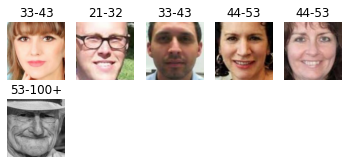

In [ ]:

get_visualization(train_loader,age_classes_debug)

In [ ]:
fileList_pre = get_fileList('PreCropped_fileList.csv')
print(fileList_pre.shape)
fileList_pre_table=get_age_race_table(fileList_pre)
fileList_pre_table.T

(5601, 4)


age  (0, 2]                         (2, 6]  ... (43, 53] (53, 116]                     
race      0   1    2    3   4 total      0  ...    total         0   1   2   3  4 total
age     165  19  291  129  99   703    274  ...      700       561  32  49  49  8   699

[1 rows x 48 columns]

###** Data Augmentation TESTING (NOT USED ANYMORE)**

Introducing different augmentation methods such as flips, rotation, noise to generate more training data and improve model learning capability.

Check the folder called Augmented_PreCropped which contains over 20k images (4x more than original) but it's in Black and White right now.

Will probably want to reduce the number of images from 20k to 10k. So only some images from Debug_PreCropped will be augmented (approximately half the original images will be augmented).

In [ ]:
#def data_augmentation():

k = 0
#arrays to store original and augmented dataset
final_dataset = []

for each in dataset.imgs:
  img_path = each[0]
  bw_img = cv2.imread(img_path,1)
  print(img_path)
  img = cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB)
  image_fileName = img_path.split('/')[-1]

  # Original image
  #final_dataset.append(img)
  f = plt.figure()
  plt.axis('off')
  plt.imshow(img)
  save_augmented_image_test(f,image_fileName)
  plt.close(f)

  if k % 4 == 0:
    # Flip horizontally; no point flipping vertically because it is unlikely the model will be tested by upside down images
    img_flip = np.fliplr(img)
    #final_dataset.append(img_flip)
    image_fileName_flip = image_fileName.split('.')[0] + '_flipped'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_flip)
    save_augmented_image_test(f,image_fileName_flip)
    plt.close(f)

    # rotation
    img_rotate = rotate(img, random.uniform(-45,45))
    #final_dataset.append(img_rotate)
    image_fileName_rotate = image_fileName.split('.')[0] + '_rotated'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_rotate)
    save_augmented_image_test(f,image_fileName_rotate)
    plt.close(f)

    # noise
    img_noise = random_noise(img, mode='s&p', clip=True)
    #final_dataset.append(img_noise)
    image_fileName_noise = image_fileName.split('.')[0] + '_noise'
    f = plt.figure()
    plt.axis('off')
    plt.imshow(img_noise)
    save_augmented_image_test(f,image_fileName_noise)
    plt.close(f)

  if k <= 20:
    final_dataset.append(img)
    final_dataset.append(img_flip)
    final_dataset.append(img_rotate)
    final_dataset.append(img_noise)
  else:
    break

  k += 1

/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219140623097.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219154018476.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219154556757.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219154724341.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219190045155.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219190621290.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219190824794.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219191012803.jpg
/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Debug_PreCropped/0-2/1_0_0_20161219193326

In [ ]:
# want to make sure the number of images is correct
transform = transforms.Compose(
    [  transforms.Resize((227,227)),
     transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
augmented_dataset = torchvision.datasets.ImageFolder('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Augmented_PreCropped',
                                                    transform=transform)

len(augmented_dataset)

KeyboardInterrupt: ignored

In [ ]:
age_classes_debug

['0-2', '13-20', '21-32', '3-6', '33-43', '44-53', '53-100+', '7-12']

In [ ]:
def save_augmented_image_test(img, fileName):
  age = int(fileName.split('_')[0])
  age_range = get_age(age)
    
  img.savefig('/content/gdrive/My Drive/APS360 Group9 Project/Project/Dataset/Augmented_PreCropped3/' + age_range + '/' + fileName,
          quality=95,
            bbox_inches='tight',
            pad_inches=0.0)

In [ ]:
def get_age(age):
  age_range = ''
  if age <= 2:
    age_range = age_classes_debug[0]
  elif age <= 6:
    age_range = age_classes_debug[3]
  elif age <= 12:
    age_range = age_classes_debug[7]
  elif age <= 20:
    age_range = age_classes_debug[1]
  elif age <= 32:
    age_range = age_classes_debug[2]
  elif age <= 43:
    age_range = age_classes_debug[4]
  elif age <= 53:
    age_range = age_classes_debug[5]
  else:
    age_range = age_classes_debug[6]

  return age_range

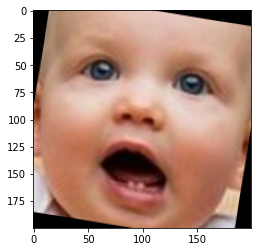

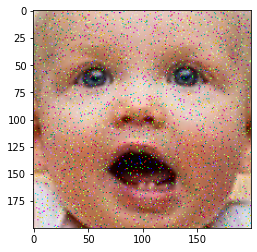

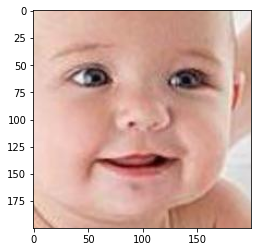

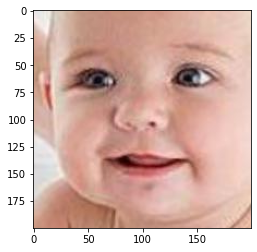

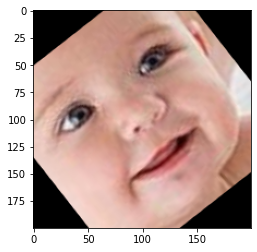

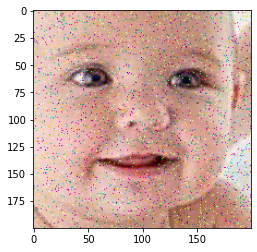

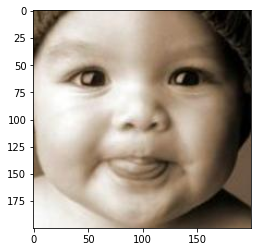

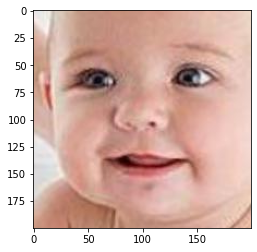

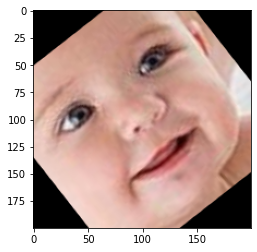

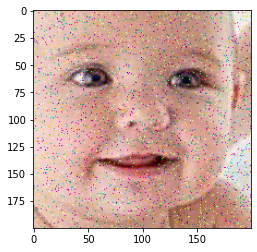

In [ ]:
# visualize augmented data
for i in range(10):
  plt.figure()
  plt.imshow(final_dataset[i+30])

##**User upload image, crop image immediately**

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')


In [ ]:
#Multiple faces in the same picture (e.g. a person with a photo). Temp solution: count # of eyes. Pick the face with larger count
#Logic: Sometimes the algorithm treat norstril  or the wrinkles around eyes as eye (because they are darker). For a image with low quality, a clear face would have more eye count.

def get_face_ROI(img,padding):

  faces = face_cascade.detectMultiScale(img, scaleFactor=1.02,minNeighbors =5) #face detection
  # cropped = img
  return_img = img
  return_crop= img
  prev_eye_count=0

  for box in faces:
    x, y, width, height = box
    x2, y2 = int(x + width), int(y + height)

    x = int(x-padding) if (x-padding>0) else x
    y = int(y-padding) if (y-padding>0) else y
    x2 = int(x2+padding) if (x2+padding<img.shape[1]) else x2
    y2 = int(y2+padding) if (y2+padding < img.shape[0]) else y2
    rectangle(img, (int(x), int(y)), (x2, y2), (255, 0, 0), 2) # For testing, draw a rectangle around the face
    cropped = img[y:y2,x:x2]
    
    print( x, y,x2, y2)

    eyes = eye_cascade.detectMultiScale(cropped) # eye detection
   
    if len(eyes) >0:
      eye_count=0
      for (ex,ey,ew,eh) in eyes:
        eye_count+=1
        # cv2.rectangle(cropped,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # For testing, draw a rectangle around the eyes
      
      if eye_count > prev_eye_count:
        return_img = img
        return_crop = cropped
        prev_eye_count= eye_count
    
  return return_img,return_crop

In [ ]:
uploaded = files.upload()
fileName,fileData=[],[]
for name, data in uploaded.items():
  fileName = name
  fileData = data

  
# print(type(uploaded))
# im = Image.open(BytesIO(uploaded[fileName]))
# print(type(im))
# plt.imshow(im)

Saving 16_0_0_20170117134536197.jpg to 16_0_0_20170117134536197.jpg


16_0_0_20170117134536197.jpg
<class 'numpy.ndarray'>
567 264 651 348
18 301 486 769
572 333 719 480
738 924 787 973


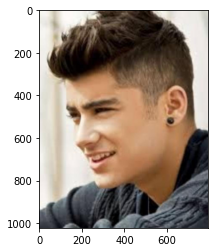

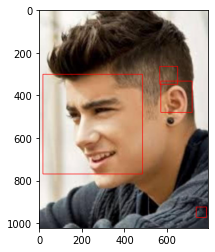

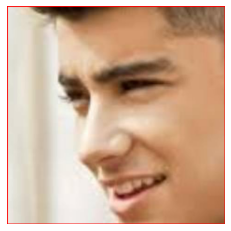

In [ ]:

padding=10
print(fileName)
img = cv2.imread(fileName)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
print(type(img))
img,cropped_result = get_face_ROI(img_cvt,padding)

# # For testing, uncomment below plt codes and the rectangle part in  get_face_ROI_crop function to draw the output image 
plt.figure()
# plt.axis('off')
plt.imshow(img)

f = plt.figure()
plt.axis('off')
plt.imshow(cropped_result)
